# Assignment 3

In [54]:
# Import themes for the notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal as sig

# Import other useful suff
import matplotlib.cm as cee_em
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

# Some useful data science libraries
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import multivariate_normal as mvn

from numpy.random import randint
from skimage import io
from ipywidgets import interact
from matplotlib.patches import Ellipse

# Settings for the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

## Generate Random Data

In [ ]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data
print(X.shape)

## K-means

Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.

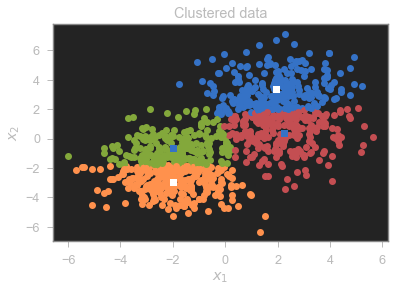

In [3]:
from gstuff import KMeans as km

clf = km.KMeans(4, 1e-5)

clf.cluster(X.T)
labels = clf.get_class_labels()
means = clf.get_means()

c = np.array(["r","g", "b", "y"])
for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[labels[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Clustered data")

c2 = np.array(["b","b", "w", "w"])
for m in range(means.shape[1]):
    plt.plot(means[0,m],means[1,m],c2[m]+"s")
    
plt.show()

##### **Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

In [4]:
#display(Image(filename='./kmeans.jpg'))

$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

## GMM

Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.

**Use your newly created function to cluster the above generated data set. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

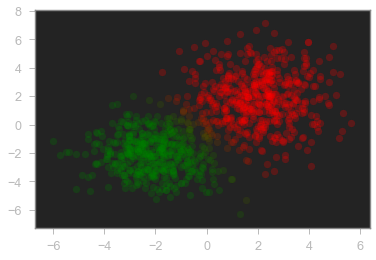

In [5]:
from gstuff import GMM as gm
clf = gm.GMM(2, 1e-5)
clf.fit(X.T)  # this fit function takes row data
clf.draw()

In [ ]:
display(Image(filename='./gmm.jpg'))

# Perform K-means on an image

In [ ]:
im = io.imread('./cartoon.png')
#plt.imshow(im/np.max(im))
#plt.show()
X = im.reshape(-1, 4)
clf = KMeans(n_clusters=8, max_iter=1000, tol=1e-5)
labels = clf.fit_predict(X)

c = np.array([[0, 79, 79], [255, 255, 255], [255, 143, 31], 
              [12, 12, 1], [214, 218, 221], [232, 116, 0],
             [225, 200, 0], [161, 161, 16]])

generated_im = np.zeros([225*225, 3]).astype(np.uint8)

for n in range (0, generated_im.shape[0]):
    generated_im[n] = c[labels[n], :]


generated_im = generated_im.reshape(225, 225, 3)
plt.imshow(generated_im)

print(X.shape)
unique = X[0, :][np.newaxis, :]
matched = True


for n in range(0, X.shape[0]):
    matched = False
    for k in range(0, unique.shape[1]):
        if (np.all(X[n, :] == unique[:, k])):
            matched = True
'''
    if (not matched):
        print("New entry") # without this dummy printout, this code crashes
        unique = np.vstack((unique, X[n, :][np.newaxis, :]))
        


print("Total number of unique colors: {}".format(unique.shape[0]))
'''

## Clustering of colors

Note that the colors in the image above are clustered around only a few colors. **You need to find the clusters using the k-means algorithm in scikit-learn. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

*Note:* Before you produce the plot using plt.imshow(), make sure the image data is op type "unint8", i.e. set dtype = "uint8"

In [8]:
#display(Image(filename='./wm_cartoon_repro.png'))

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [9]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [10]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

10


## Inspect the different digit  images

In [20]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cee_em.binary)   
    
    plt.show()
    
#w_show_digits = interact(show_digits, k =(0, 1796)) 


## GMM

Next, fit the data to a 10 component GMM model, using the scikit-learn package.

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

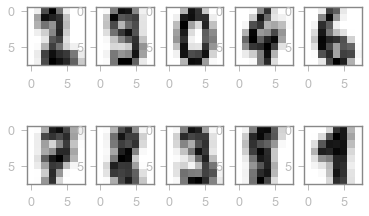

In [52]:
data = digits.data
np.random.seed(1)
# Insert GMM code
clf = GMM(n_components=10)
clf.fit(data)
means = clf.means_
covs = clf.covariances_

im_means = means.reshape((10, 8, -1))
f, axarr = plt.subplots(2,5)
index = 0
for n in range(0, 2):
    for m in range(0, 5):
        axarr[n, m].imshow(im_means[index, :, :], cmap=cee_em.binary)
        index += 1
        

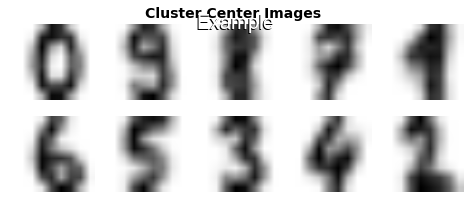

In [16]:
display(Image(filename='./wm_GMM.png'))

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

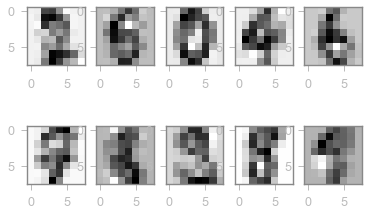

In [59]:
samples = np.zeros(means.shape)

for n in range(0, means.shape[0]):
    samples[n] = mvn.rvs(mean=means[n, :], cov=covs[n, :, :], size=1)
    
    
im_samples = samples.reshape((10, 8, -1))
f, axarr = plt.subplots(2,5)
index = 0
for n in range(0, 2):
    for m in range(0, 5):
        axarr[n, m].imshow(im_samples[index, :, :], cmap=cee_em.binary)
        index += 1